In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
의장 = pd.read_excel(r'C:\Users\user\Desktop\정공센_업추분석\0.마포구 기초의회장단 업무추진비(정리).xlsx',sheetname='의장',index_col="No")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\2018년_정공센_알권리감시단_업무추진비_코드\\0.마포구 기초의회장단 업무추진비(정리).xlsx'

In [ ]:
의장.head()

In [15]:
의장.집행일시 = pd.to_datetime(의장.집행일시)

In [16]:
의장 = 의장.set_index(의장.집행일시)

In [200]:
의장.집행장소.groupby(의장.집행장소).count().sort_values(ascending=False)

집행장소
영광식당 서울마포구광성로17                36
동경 서울마포구월드컵북로1길6               30
미진 서울마포구월드컵북로2길37              28
미진일식／（주）성태 서울마포구월드컵북로2길37      28
무쇠등심 경기고양시덕양구행주로15번길           25
송가네감자탕보쌈 서울마포구동교로247           25
경복궁서교점（주）덕 서울마포구월드컵북로37        22
파리바게트 서울마포구월드컵북로34             20
부연부 서울마포구월드컵로29                17
춘향골남원추어탕 서울마포구성산동              17
콩고을 서울마포구성미산로2길33              13
다슬기전문 경기고양시덕양구서오릉로             12
조박사복해장국 서울마포구동교로               11
한성축산 서울마포구연남로33                11
화정가든 경기고양시덕양구행주로17번길5-32       11
호남식당 서울마포구월드컵로235              10
거북이집 서울서대문구연희맛로43070           10
남원추어탕 서울마포구월드컵북로110             9
둥지 서울마포구월드컵북로56                 9
양지설렁탕상암점 서울마포구매봉산로2길3           8
태양 서울마포구방울내로7길14                8
원조숯불오리구이 서울마포구동교로19길4           8
매화 서울마포구성미산로192                 7
마포양지설렁탕 서울마포구백범로36길2            7
황구영양탕 서울마포구백범로16길14             7
가나손맛콩나물국밥 서울마포구서교동              7
남도한우마을 서울마포구월드컵로105             7
노고산갈비 서울마포구백범로14                7
춘자대구탕 서울마포구월드컵북로1길50            7
청원 서울마포구월

In [14]:
임시 =의장.집행장소.groupby(의장.집행장소).count()

In [35]:
임시.filter(like='영광')

집행장소
영광식당    39
Name: 집행장소, dtype: int64

## 일주일 단위

In [132]:
일주일_단위 = 의장.resample('W-Mon').apply({'집행금액':np.sum}).fillna(0)

In [68]:
일주일_단위 =일주일_단위.astype(np.int64)

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

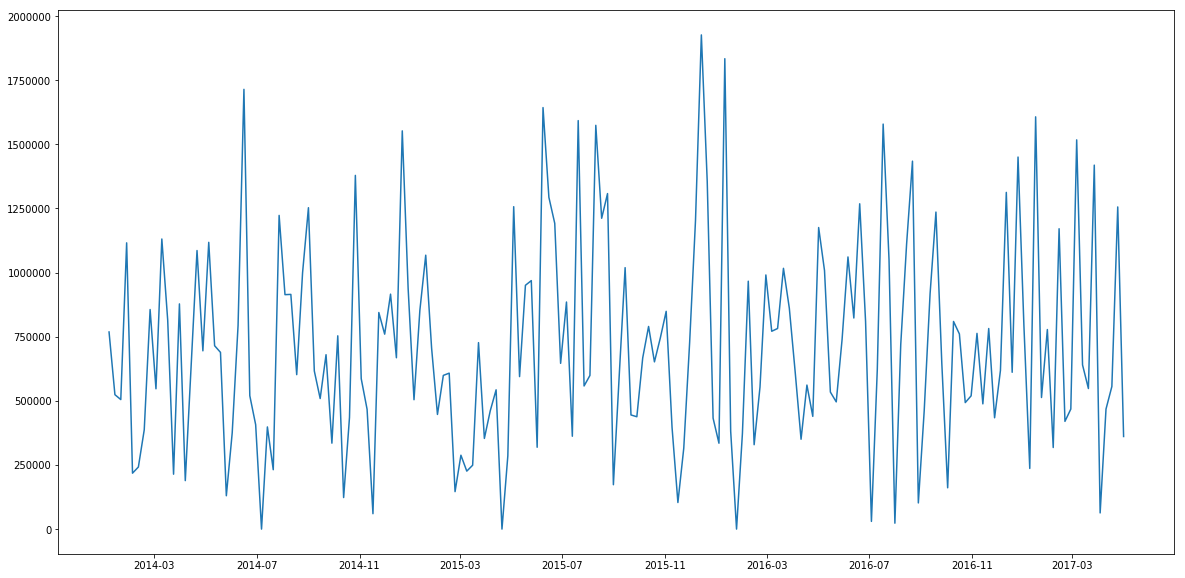

In [73]:
plt.plot(일주일_단위)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [70]:
평균_금액이상=일주일_단위[일주일_단위 > 일주일_단위.mean()].집행금액.dropna()

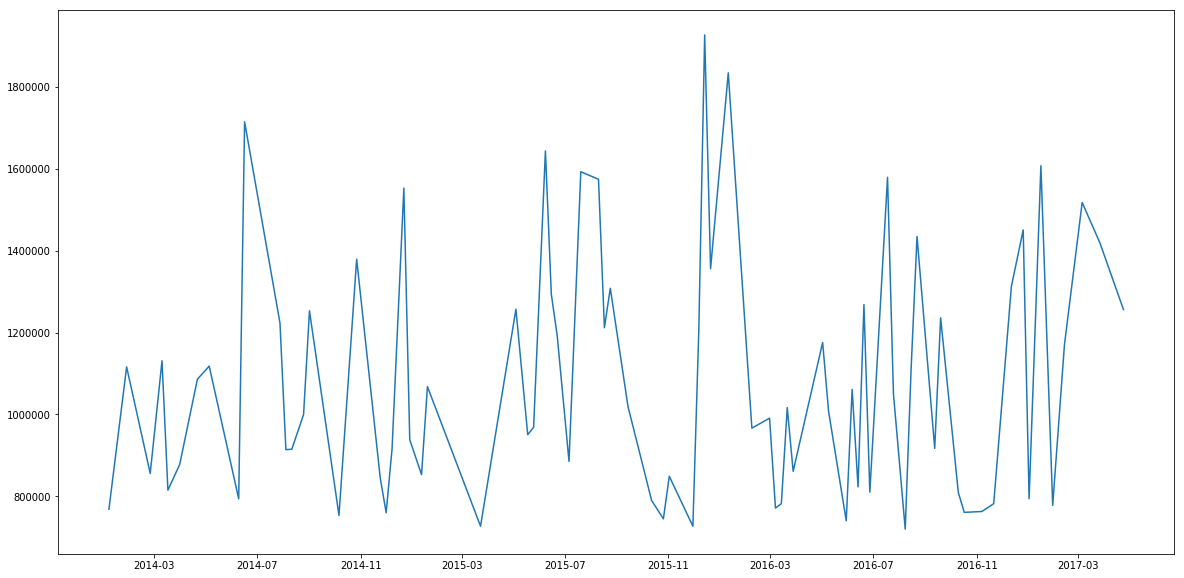

In [71]:
plt.plot(평균_금액이상)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## 한달간

In [43]:
한달_ =의장.resample('M').apply({'집행금액':np.sum}).fillna(0)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

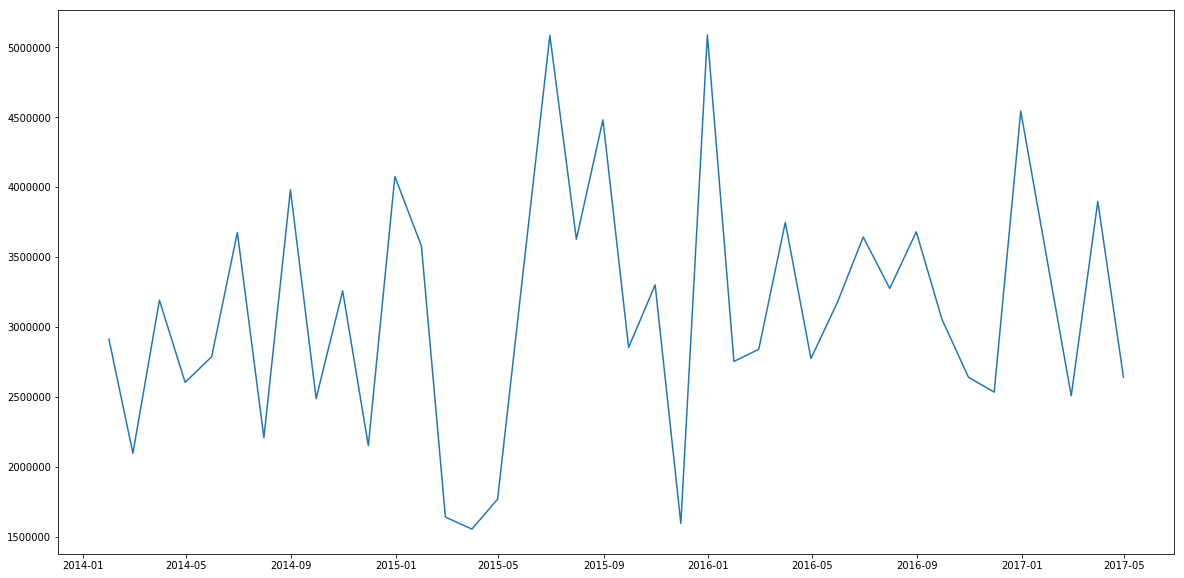

In [63]:
plt.plot(한달_)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()